# Home Cage Dopamine Analysis

In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from trial_class import *
from experiment_class import Experiment

from hc_extension import *
from bouts_extension import *

In [2]:
# NAc: #15616F
# mPFC: #FFAF00

# NAc
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac_csvs"
brain_region = '#15616F'

# mPFC
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\mpfc"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\mpfc_csvs"
# brain_region = '#FFAF00'

In [3]:
# groups csv + experiment data into one variable
experiment = Experiment(experiment_path, csv_base_path)

# batch process the data, removing the specified time segments for subjects
experiment.default_batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac\n1-240508-080051\Notes.txt
read from t=0s to t=1783.78s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac\n2-240508-092906\Notes.txt
read from t=0s to t=1810.33s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac\n3-240509-062454\Notes.txt
read from t=0s to t=1803.43s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac\n4-240509-075317\Notes.txt
read from t=0s to t=1802.32s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac\n5-240823-085032\Notes.txt
read from t=0s to t=1789.26s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Home_Cage\nac\n6-240823-101436\Notes.txt
read from

In [4]:
bout_definitions = [
    {'prefix': 'Short_Term', 'introduced': 'Short_Term_Introduced', 'removed': 'Short_Term_Removed'},
    {'prefix': 'Long_Term', 'introduced': 'Long_Term_Introduced', 'removed': 'Long_Term_Removed'},
    {'prefix': 'Novel', 'introduced': 'Novel_Introduced', 'removed': 'Novel_Removed'}
]

experiment.group_extract_manual_annotations(bout_definitions, first_only=True)

Processing behaviors for n1-240508-080051...
Processing behaviors for n2-240508-092906...
Processing behaviors for n3-240509-062454...
Processing behaviors for n4-240509-075317...
Processing behaviors for n5-240823-085032...
Processing behaviors for n6-240823-101436...
Processing behaviors for n7-240824-062103...
Processing behaviors for nn1-250120-063024...
Processing behaviors for nn2-250120-072910...
Processing behaviors for nn3-250121-074834...
Processing behaviors for nn4-250121-084228...
Processing behaviors for nn5-250120-081227...
Processing behaviors for nn6-250120-085156...
Processing behaviors for nn7-250121-094048...
Processing behaviors for nn8-250121-101912...


### Peak standard z-score

In [5]:
experiment.compute_all_da_metrics(max_bout_duration=5, 
                                  mode='standard')

Computing DA metrics for n1-240508-080051 ...
Computing DA metrics for n2-240508-092906 ...
Computing DA metrics for n3-240509-062454 ...
Computing DA metrics for n4-240509-075317 ...
Computing DA metrics for n5-240823-085032 ...
Computing DA metrics for n6-240823-101436 ...
Computing DA metrics for n7-240824-062103 ...
Computing DA metrics for nn1-250120-063024 ...
Computing DA metrics for nn2-250120-072910 ...
Computing DA metrics for nn3-250121-074834 ...
Computing DA metrics for nn4-250121-084228 ...
Computing DA metrics for nn5-250120-081227 ...
Computing DA metrics for nn6-250120-085156 ...
Computing DA metrics for nn7-250121-094048 ...
Computing DA metrics for nn8-250121-101912 ...


In [6]:
exp_da_dict = get_trial_dataframes(experiment)

In [7]:
desired_bouts = ['Short_Term-1', 'Novel-1', 'Short_Term-2', 'Long_Term-1']
da_metadata_df = create_da_metrics_dataframe(exp_da_dict, behavior="Investigation", desired_bouts=desired_bouts)

In [8]:
# Copy original DataFrame
ordered_df = da_metadata_df.copy()

# Desired bout order
desired_bout_order = ["Short_Term-1", "Short_Term-2", "Long_Term-1", "Novel-1"]

# 1. Filter and reorder Bout as categorical
ordered_df = ordered_df[ordered_df["Bout"].isin(desired_bout_order)].copy()
ordered_df["Bout"] = pd.Categorical(ordered_df["Bout"], categories=desired_bout_order, ordered=True)

# 2. Call the plot function (it will respect the categorical order when pivoted)

In [9]:
ordered_df.head()

,Subject,Bout,Behavior,AUC,Max Peak,Mean Z-score
0,n1,Short_Term-1,Investigation,5.923871,2.890864,2.468450
1,n1,Novel-1,Investigation,3.672772,2.928168,1.435779
2,n1,Short_Term-2,Investigation,-1.308419,0.732577,-0.414342
3,n1,Long_Term-1,Investigation,2.264283,2.431719,2.267108
4,n2,Short_Term-1,Investigation,0.609559,2.219371,0.214915


In [10]:
da_metadata_df.head()

,Subject,Bout,Behavior,AUC,Max Peak,Mean Z-score
0,n1,Short_Term-1,Investigation,5.923871,2.890864,2.468450
1,n1,Novel-1,Investigation,3.672772,2.928168,1.435779
2,n1,Short_Term-2,Investigation,-1.308419,0.732577,-0.414342
3,n1,Long_Term-1,Investigation,2.264283,2.431719,2.267108
4,n2,Short_Term-1,Investigation,0.609559,2.219371,0.214915


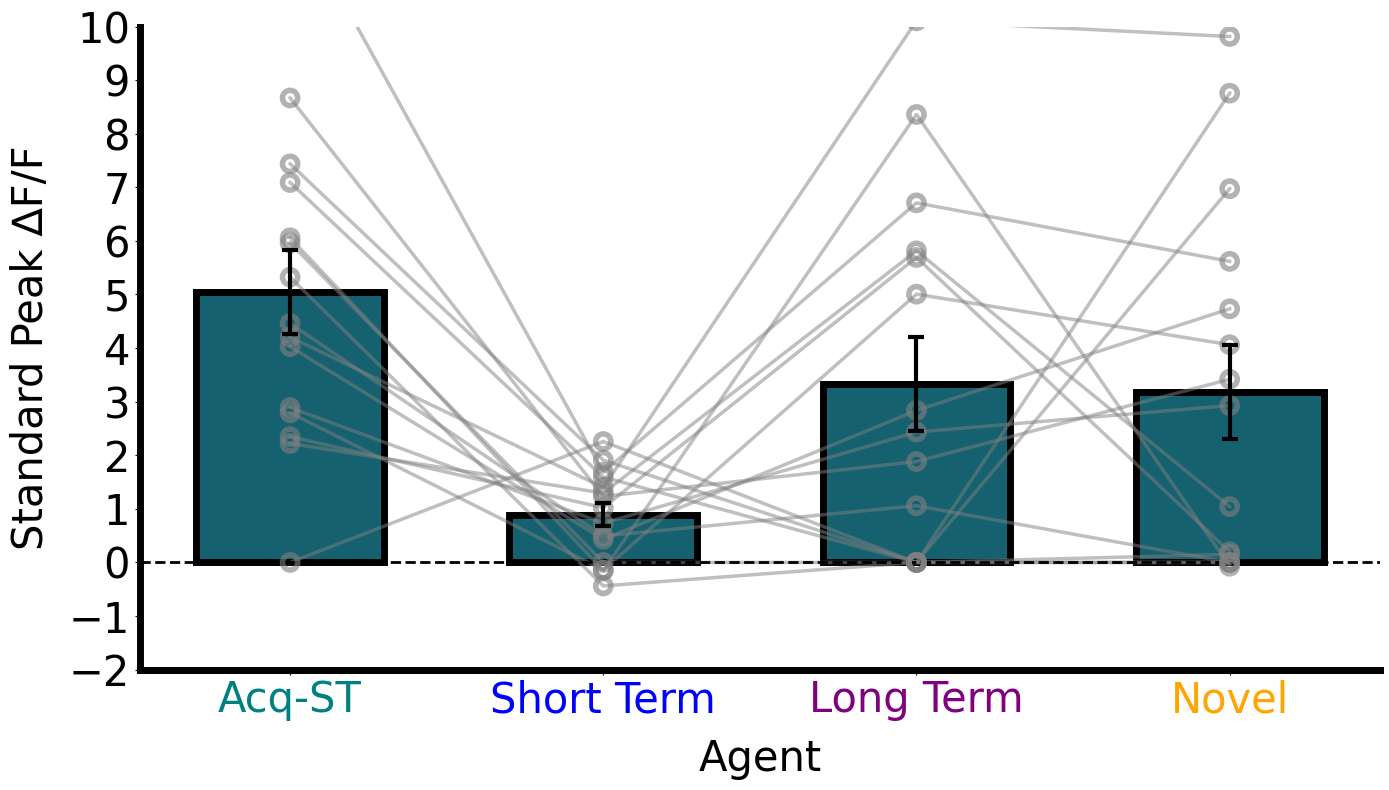


Paired t-test results (all pairwise combinations):
Short_Term-1 vs Short_Term-2: p = 0.0001 (***)
Short_Term-1 vs Long_Term-1: p = 0.1607 (ns)
Short_Term-1 vs Novel-1: p = 0.0795 (ns)
Short_Term-2 vs Long_Term-1: p = 0.0180 (*)
Short_Term-2 vs Novel-1: p = 0.0213 (*)
Long_Term-1 vs Novel-1: p = 0.8934 (ns)


In [11]:
plot_behavior_across_bouts_no_identities(
    metadata_df=ordered_df,
    y_col="Max Peak",
    ylabel="Standard Peak ∆F/F",
    xlabel="Agent",
    custom_xtick_labels=["Acq-ST", "Short Term", "Long Term", "Novel"],
    custom_xtick_colors=["teal", "blue", "purple", "orange"],
    ylim=(-2, 10),
    yticks_increment=1,
    bar_color=brain_region,
    figsize=(14, 8),
    save=None,
    save_name ="mDA",
    title=None
)

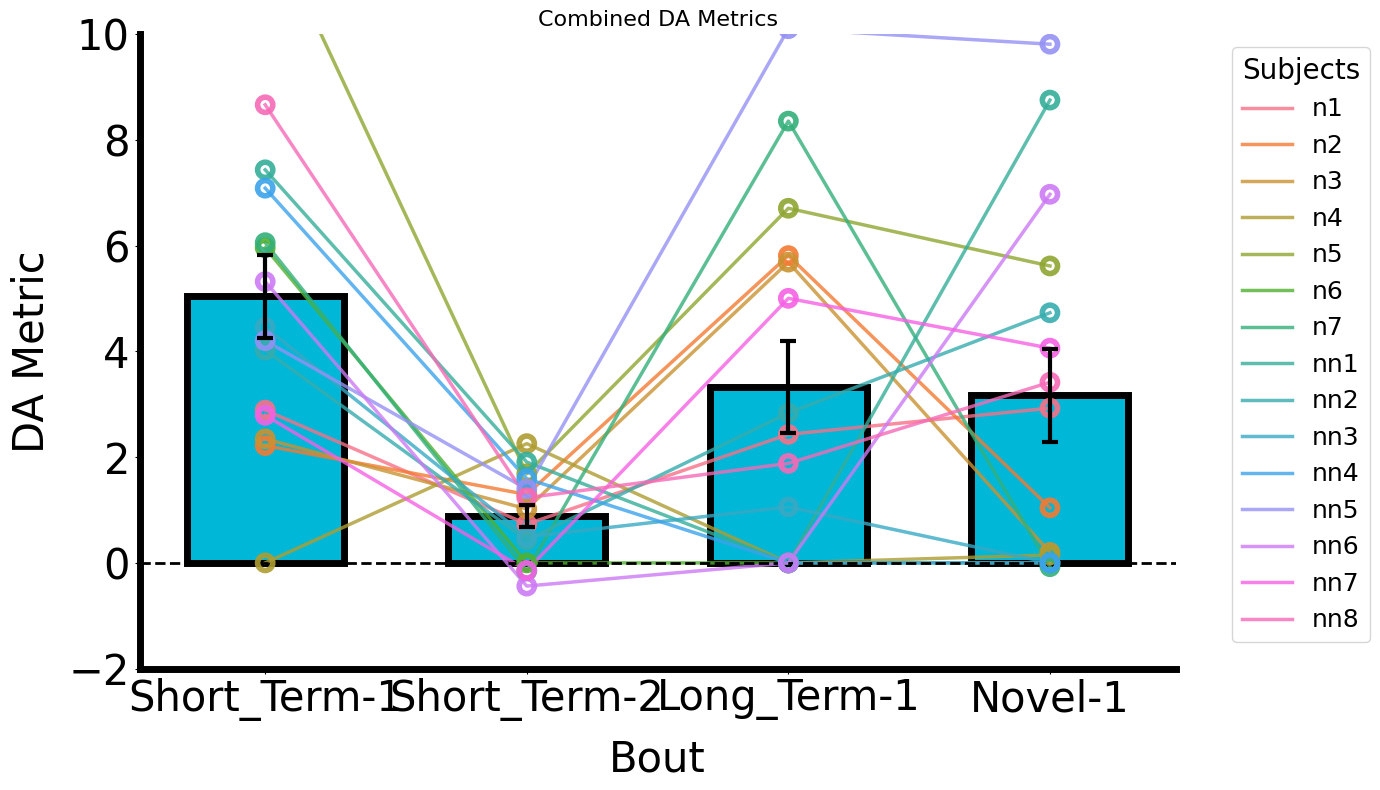

In [12]:
plot_behavior_across_bouts_with_identities(
    metadata_df=ordered_df,
    y_col="Max Peak",
    title="Combined DA Metrics", 
    ylabel="DA Metric", 
    xlabel="Bout", 
    custom_xtick_labels=None, 
    custom_xtick_colors=None, 
    ylim=(-2,10), 
    bar_color="#00B7D7", 
    yticks_increment=None, 
    figsize=(14,8), 
    pad_inches=0.1,
    save=False,
    save_name=None
)

In [13]:
experiment.reset_all_behaviors()
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = False)

# total_avg_bout_duration = metadata_df["Average Bout Duration"].mean()
# print(f"Total Average Bout Duration: {total_avg_bout_duration:.4f}")
# Proceed with DA metric computation after all files are processed
experiment.compute_all_da_metrics(max_bout_duration=4,
                                  mode='standard')

Processing behaviors for n1-240508-080051...
Processing behaviors for n2-240508-092906...
Processing behaviors for n3-240509-062454...
Processing behaviors for n4-240509-075317...
Processing behaviors for n5-240823-085032...
Processing behaviors for n6-240823-101436...
Processing behaviors for n7-240824-062103...
Processing behaviors for nn1-250120-063024...
Processing behaviors for nn2-250120-072910...
Processing behaviors for nn3-250121-074834...
Processing behaviors for nn4-250121-084228...
Processing behaviors for nn5-250120-081227...
Processing behaviors for nn6-250120-085156...
Processing behaviors for nn7-250121-094048...
Processing behaviors for nn8-250121-101912...
Computing DA metrics for n1-240508-080051 ...
Computing DA metrics for n2-240508-092906 ...
Computing DA metrics for n3-240509-062454 ...
Computing DA metrics for n4-240509-075317 ...
Computing DA metrics for n5-240823-085032 ...
Computing DA metrics for n6-240823-101436 ...
Computing DA metrics for n7-240824-062103

## DA across Subsequent Bouts

In [14]:
exp_da_dict = get_trial_dataframes(experiment)

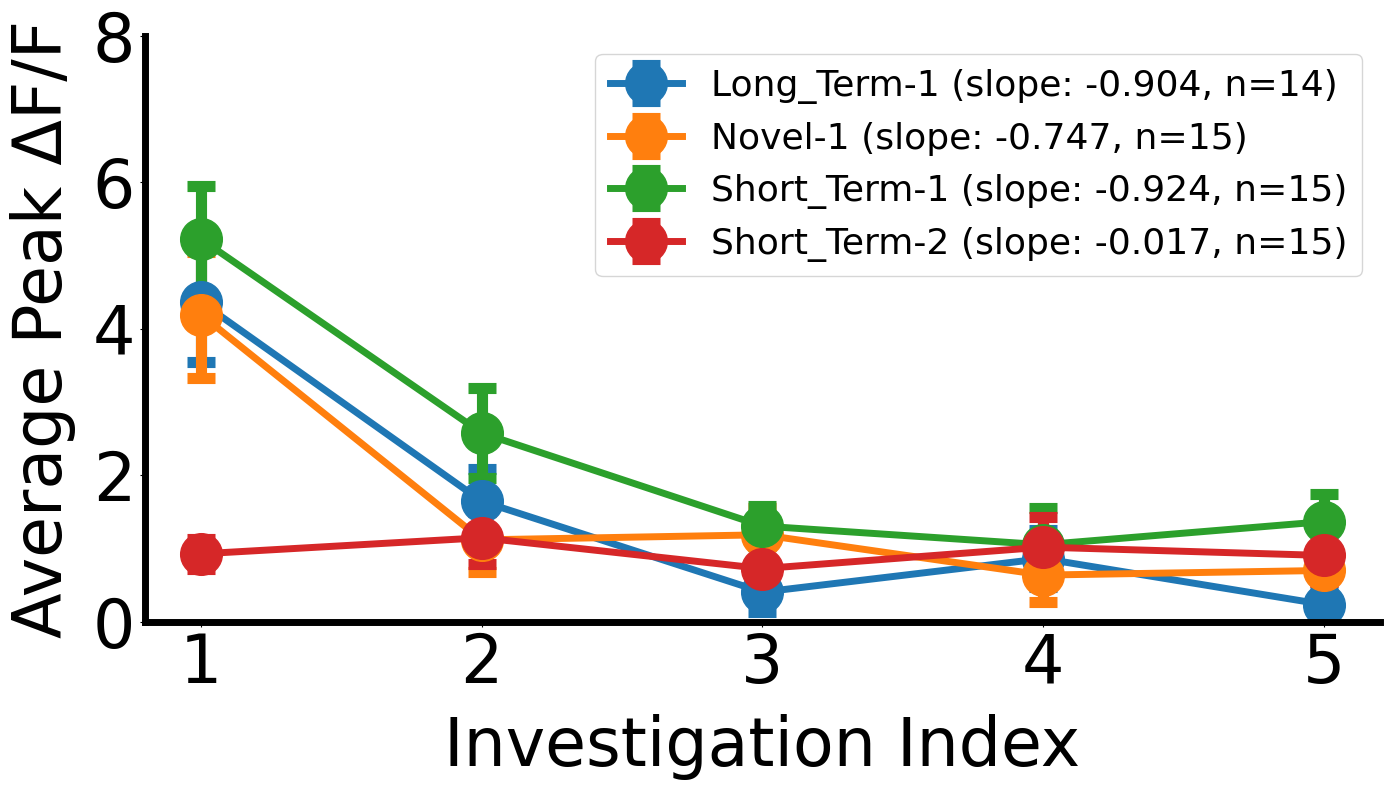


=== Computed Metric (SLOPE): ===
Bout: Long_Term-1, slope = -0.904
Bout: Novel-1, slope = -0.747
Bout: Short_Term-1, slope = -0.924
Bout: Short_Term-2, slope = -0.017


,Bout,BehaviorIndex,SubjectCount,AvgPeak,StdPeak,SEM
0,Long_Term-1,1,14,4.364146,3.047791,0.814556
1,Long_Term-1,2,14,1.644435,1.624209,0.434088
2,Long_Term-1,3,14,0.403198,1.020005,0.272608
3,Long_Term-1,4,14,0.861265,1.436302,0.383868
4,Long_Term-1,5,13,0.233630,0.910255,0.252459
5,Novel-1,1,15,4.193237,3.329079,0.859564
6,Novel-1,2,15,1.116574,1.723972,0.445128
7,Novel-1,3,15,1.185978,1.407972,0.363537
8,Novel-1,4,14,0.635619,1.364775,0.364751
9,Novel-1,5,12,0.698690,1.171779,0.338263


In [ ]:
plot_peak_for_subsequent_behaviors(
    exp_da_dict,
    behavior="Investigation",
    selected_bouts=["Short_Term-1", "Short_Term-2", "Long_Term-1", "Novel-1"],
    n_subsequent_behaviors=5,
    peak_col="Max Peak",
    metric_type='slope', 
    xlabel="Investigation Index",
    ylabel="Average Peak ΔF/F",
    ylim=(0, 8),
    ytick_increment=2,
    plot_title="",
    save = False,
    save_path=r"Home_Cage_Plots\mPFC_DA\peaks_for_subsequent_behaviors.png" 
)